In [1]:
import torch
import numpy
import pandas as pd
import os
import random
#import transformer_lens.utils as utils
#from transformer_lens import ActivationCache, HookedTransformer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
main_path = '../mean_ablation_predictions_different_gaps/'
heads_layers_files = os.listdir(main_path)
if '.DS_Store' in heads_layers_files:
    heads_layers_files.remove('.DS_Store')

In [7]:
len(heads_layers_files)

129

In [208]:
gap_heads_layers_files = []
gap = 8
for each in heads_layers_files:
    if each.split('_')[-1].split('.')[0] == str(gap):
        gap_heads_layers_files.append(each)
len(gap_heads_layers_files)

6

In [209]:

main_pred = pd.read_csv('../dataset_csvs_singular_plural/predictions/correct_preds_xl_s_plural.csv')
non_ablated_preds = main_pred['predictions'].tolist()
main_prob = pd.read_csv('../dataset_csvs_singular_plural/predictions/correct_preds_xl_s_plural.csv')['probabilities'].mean()

true_preds_per_file = []
common_elements_per_file = []
count_common_per_file = []
more_or_less_true = []
slayer = []
elayer = []
names_temp_true_preds_per_file = []
per_file_prob = []
prob_diff = []
for inde, file_name in enumerate(gap_heads_layers_files):
    print(inde, file_name)
    temp_count = 0
    temp_true_preds = []
    temp = pd.read_csv(main_path + file_name)
    for i, row in temp.iterrows():
        plural = row['plural']
        pred = row['prediction']
        if plural == pred[1:]:
            temp_count += 1
            temp_true_preds.append(pred[1:])
    
    
    true_preds_per_file.append(temp_count)
    names_temp_true_preds_per_file.append(temp_true_preds)
    common_elements = set(non_ablated_preds).intersection(temp_true_preds)
    common_elements_per_file.append(list(common_elements))
    count_common = len(common_elements)
    count_common_per_file.append(count_common)
    more_or_less_true.append(len(non_ablated_preds) - count_common)
    split_values = file_name.split('_')
    
    
    temp_prob = temp['probability'].mean()
    per_file_prob.append(temp_prob)
    prob_diff.append(main_prob - temp_prob)

    start = split_values[-4] 
    end = split_values[-2]

    slayer.append(start)
    elayer.append(end)
        
    



0 predictions_s_plural_XL_layers_16_to_23_8.csv
1 predictions_s_plural_XL_layers_0_to_7_8.csv
2 predictions_s_plural_XL_layers_8_to_15_8.csv
3 predictions_s_plural_XL_layers_32_to_39_8.csv
4 predictions_s_plural_XL_layers_40_to_47_8.csv
5 predictions_s_plural_XL_layers_24_to_31_8.csv


In [210]:
len(non_ablated_preds)

80

In [211]:
df = pd.DataFrame({
    'names_temp_true_preds_per_file':names_temp_true_preds_per_file,
    'true_preds_per_file':true_preds_per_file,
    'common_elements_per_file':common_elements_per_file,
    'count_common_per_file':count_common_per_file,
    'more_or_less_true':more_or_less_true,
    'slayer':slayer,
    'elayer':elayer,
    'per_file_prob':per_file_prob,
    'prob_diff':prob_diff
    
})

In [212]:
df.shape

(6, 9)

In [213]:
df['true_pred_minus_common_count'] = df['true_preds_per_file'] - df['count_common_per_file']

In [214]:
df.to_csv('../dataset_csvs_singular_plural/predictions/layer_head_analysis_gap_' + str(gap) + '.csv')

In [215]:
df['count_common_per_file'].unique()

array([79, 34, 80, 76])

In [216]:
len(non_ablated_preds)

80

In [217]:
df[df['count_common_per_file'] < 70]

,names_temp_true_preds_per_file,true_preds_per_file,common_elements_per_file,count_common_per_file,more_or_less_true,slayer,elayer,per_file_prob,prob_diff,true_pred_minus_common_count
2,"[cats, books, cars, flowers, computers, window...",36,"[tires, windows, bulbs, fingers, laptops, fork...",34,46,8,15,0.229962,0.214642,2


In [218]:
df[(df['true_preds_per_file'] < 80) & (df['true_preds_per_file'] > 70)]


,names_temp_true_preds_per_file,true_preds_per_file,common_elements_per_file,count_common_per_file,more_or_less_true,slayer,elayer,per_file_prob,prob_diff,true_pred_minus_common_count
5,"[cats, dogs, books, chairs, houses, cars, appl...",79,"[tires, clips, windows, moons, bulbs, trips, c...",76,4,24,31,0.35039,0.094213,3


In [219]:
df[df['true_preds_per_file'] > 80 ]

,names_temp_true_preds_per_file,true_preds_per_file,common_elements_per_file,count_common_per_file,more_or_less_true,slayer,elayer,per_file_prob,prob_diff,true_pred_minus_common_count
0,"[cats, dogs, books, chairs, houses, cars, appl...",87,"[places, fingers, plates, movies, clouds, hats...",79,1,16,23,0.371539,0.073064,8
1,"[cats, dogs, books, chairs, houses, cars, appl...",84,"[places, fingers, plates, movies, clouds, hats...",79,1,0,7,0.390597,0.054006,5


In [220]:
max_diff = df['prob_diff'].max()
min_diff = df['prob_diff'].min()
max_diff, min_diff

(0.21464160078124503, 0.04845450275144941)

In [221]:
df[df['prob_diff'] == max_diff]

,names_temp_true_preds_per_file,true_preds_per_file,common_elements_per_file,count_common_per_file,more_or_less_true,slayer,elayer,per_file_prob,prob_diff,true_pred_minus_common_count
2,"[cats, books, cars, flowers, computers, window...",36,"[tires, windows, bulbs, fingers, laptops, fork...",34,46,8,15,0.229962,0.214642,2


In [222]:
df[df['prob_diff'] == min_diff]

,names_temp_true_preds_per_file,true_preds_per_file,common_elements_per_file,count_common_per_file,more_or_less_true,slayer,elayer,per_file_prob,prob_diff,true_pred_minus_common_count
4,"[cats, dogs, books, chairs, houses, cars, appl...",80,"[places, fingers, plates, movies, clouds, hats...",80,0,40,47,0.396149,0.048455,0


<Axes: >

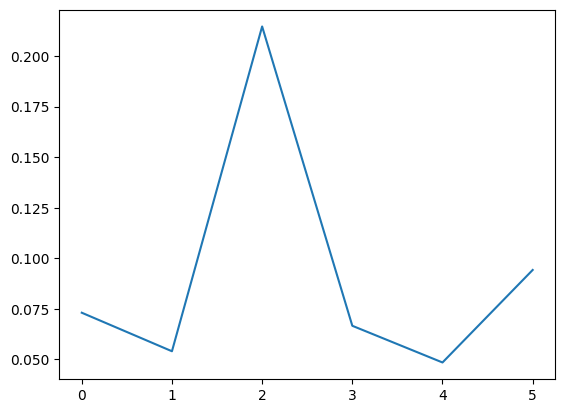

In [223]:
df['prob_diff'].plot()